In [2]:
# all the imports

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
# I'm gonna store the dataframe into df
df = pd.read_csv('data/Advertising.csv')
# See whats inside
df.head()


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
# This shows me how the dataframe looks

df.shape

(200, 4)

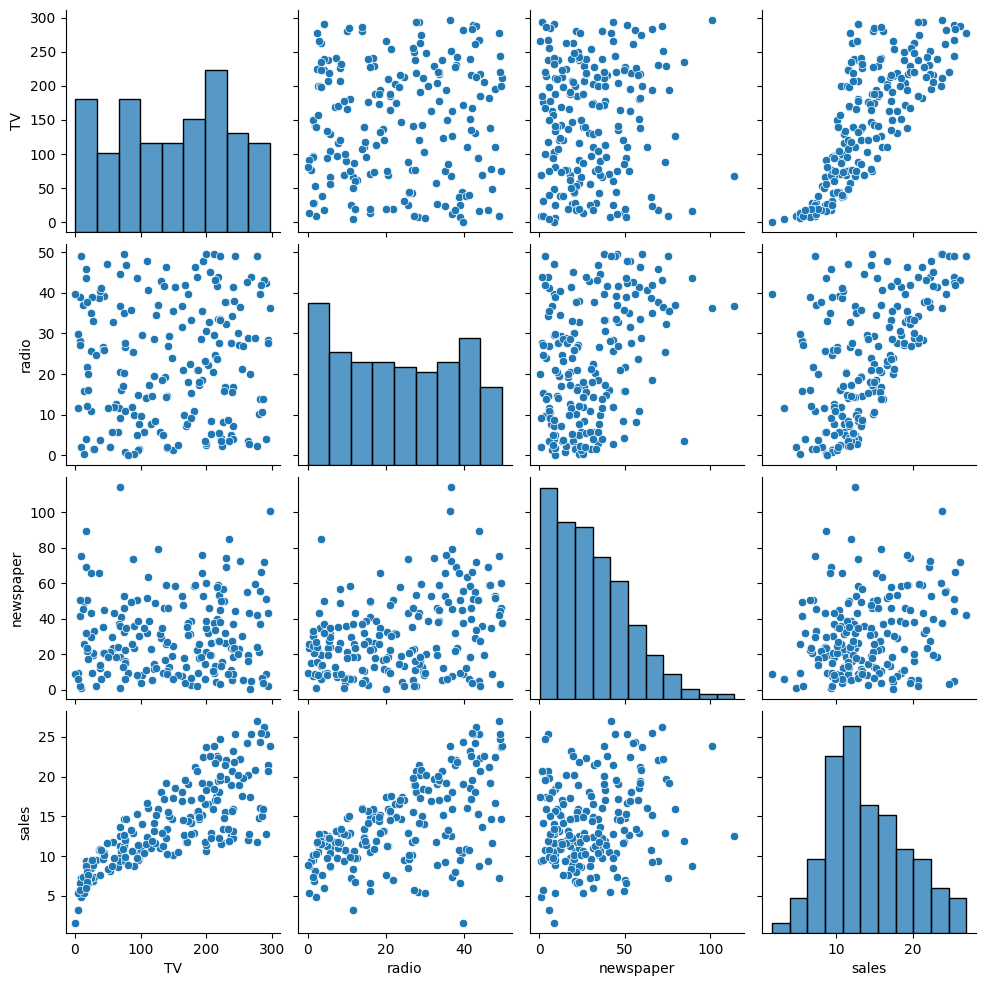

In [5]:
'''
Diagonal plots: 
    These show an histogram of each variable
    
    example:   
    The diagonal for each variabke will show how the advertisment 
    budgets spread across the dataset

Off-Diagonal plots:
    Scatter plots and compare every pair of variables

    example:
    Takes the variables of TV as and and compares them 
    to radio variables as Y
'''
sns.pairplot(df)


      For this excercise I've noticed Sales got the best correlation outputs
      out of every other variable
      


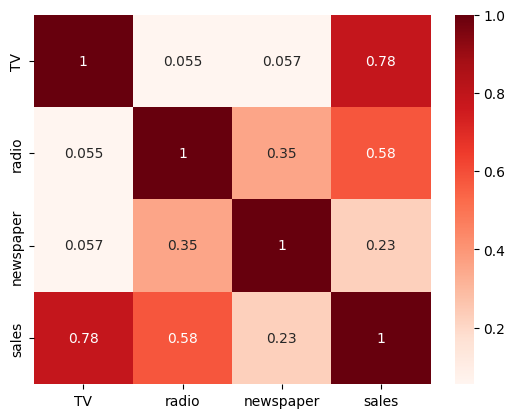

In [6]:
# df.corr() computes the correlation matrix for the Dataframe df
# that helps us which variable is more predictible
# Pearson correlation coefficient meassures the linear correlation between variables

# if its positive, it means is correlated 
# if zero it means no linear correlation at all
# if negative it has a negative correlation


sns.heatmap(df.corr(), annot = True, cmap='Reds')
print('''
      For this excercise I've noticed Sales got the best correlation outputs
      out of every other variable
      ''')

 I can tell that the density from data looks kinda normal, but has a bias to the right


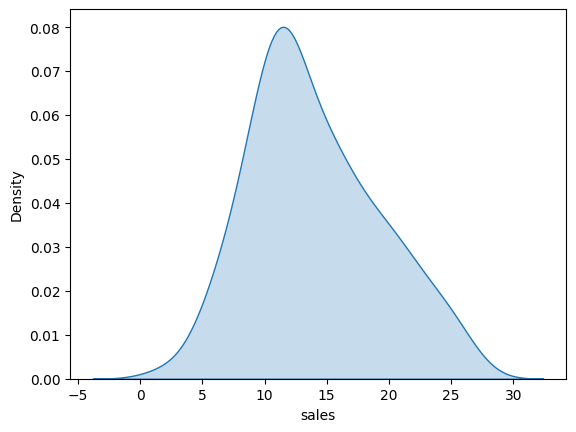

In [7]:
# Kernel Density Estimate (KDE) 
sns.kdeplot(df, x = 'sales',fill=True)
print(" I can tell that the density from data looks kinda normal, but has a bias to the right")

I can tell most data is in the center, which tells us information is very centered


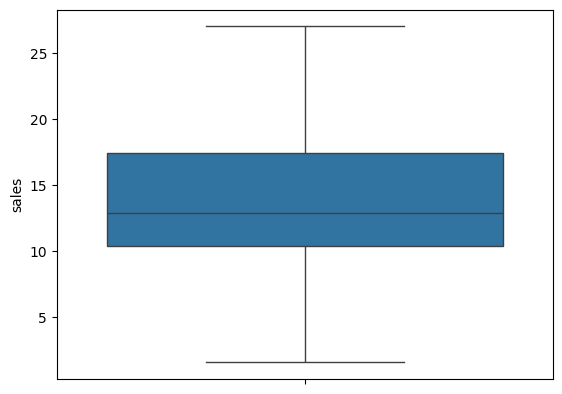

In [8]:
sns.boxplot(df['sales'])
print("I can tell most data is in the center, which tells us information is very centered")

In [9]:
df.columns.tolist()

# we search how the columns are organized, to see where sales is

['TV', 'radio', 'newspaper', 'sales']

In [10]:
'''
df.columns[-1]: Gets the last column name, which is sales.

df.drop(..., axis=1): Drops the sales column from the DataFrame, 
resulting in X containing only the feature columns: TV, radio, and newspaper.

'''


X = df.drop(df.columns[-1], axis = 1) 

# Then we assign Y to Sales because
# It has the strongest correlation with our features, making it ideal for prediction.

Y = df[df.columns[-1]] # This one is a list



In [11]:

''''
In this case we're gonna do a 70% of the info for training
leaving 30% of the data for testing
Setting random_state ensures reproducibility, so the split remains consistent across runs

X_train SET
X_test SET
Y_train SET
Y_test SET

'''

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=101)

In [12]:
from sklearn.preprocessing import StandardScaler

'''
I'm going to standardize the data.
This will transform it to have a mean of 0 and a standard deviation of 1,
making it easier for the model to interpret and compare the features.

Let's create a scaler instance.
'''
scaler = StandardScaler()

''' SCALED X train and test SET '''

# fit_transform(X_train)
# Calculates the mean and standard deviation for each feature in X_train.
# Then, scales X_train to have a mean of 0 and a standard deviation of 1.

X_train_scaled = scaler.fit_transform(X_train)

# transform(X_test)
# Applies the mean and standard deviation learned from X_train
# This ensures that both X_train and X_test are scaled consistently, 
# preventing data leakage.

X_test_scaled = scaler.transform(X_test) 

''' 
Why do we standardize?

1. Consistency in our models: Features are on the same scale.
2. Prevents Data Leakage: No information from the test set is used during training.
''' 


' \nWhy do we standardize?\n\n1. Consistency in our models: Features are on the same scale.\n2. Prevents Data Leakage: No information from the test set is used during training.\n'

In [13]:
# Im gonna store my linear regression into a model variable

model = LinearRegression()

'''

fit()
Learns the relationship between the features (X_train_scaled) 
and the target variable (Y_train).

'''

model.fit(X_train_scaled, Y_train)    

# From X_test_scaled im gonna create my predictions      
        
y_pred = model.predict(X_test_scaled)

In [14]:
print(f"""
coefficients: {model.coef_}
intercept: {model.intercept_}
RMSE: {np.sqrt(mean_squared_error(Y_test, y_pred))}
R2: {r2_score(Y_test, y_pred)}
""")


coefficients: [ 3.76599021  2.76548662 -0.00690986]
intercept: 14.311428571428571
RMSE: 1.5161519375993882
R2: 0.9185780903322445



In [15]:
residuals = Y_test - y_pred
residuals = residuals.values

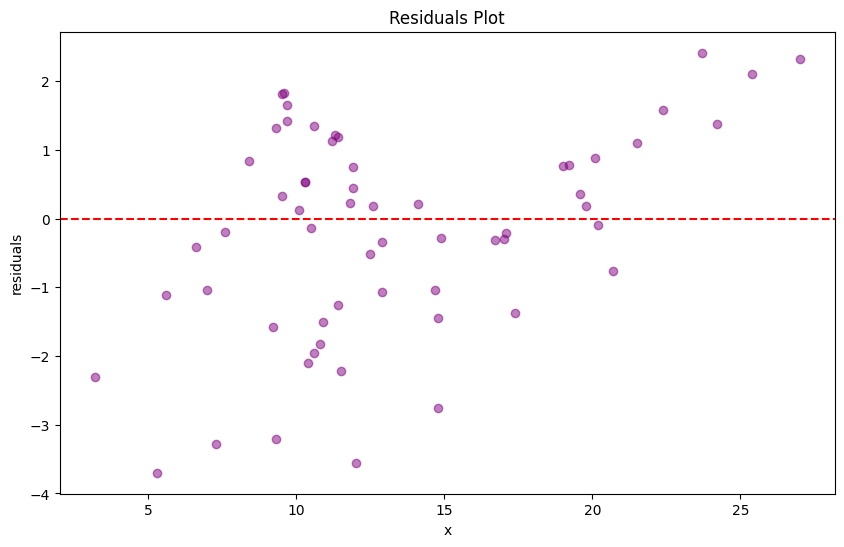

The residuals seem low density so I'd say our model was pretty accurate


In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, residuals, color = 'purple', alpha = 0.5)
plt.axhline(y = 0, color = 'red', linestyle ='--')
plt.title('Residuals Plot')
plt.xlabel('x')
plt.ylabel('residuals')

plt.show()
print("The residuals seem low density so I'd say our model was pretty accurate")


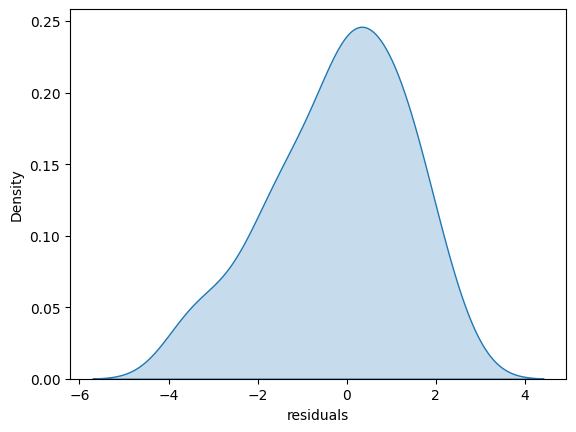

I like how our residuals perform in this graph, its very close from a normal distribution


In [17]:
res_df = pd.DataFrame({'residuals':residuals})
sns.kdeplot(res_df, x = 'residuals', fill=True)
plt.show()
print("I like how our residuals perform in this graph, its very close from a normal distribution")

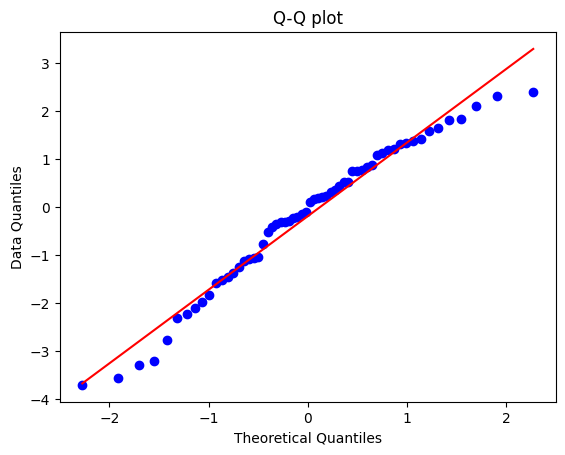

Our Q-Q plot looks decent


In [18]:
(osm, osr), (slope, intercept, r) = stats.probplot(residuals, dist='norm', plot = plt)
plt.title('Q-Q plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Data Quantiles')
plt.show()
print("Our Q-Q plot looks decent")

In [19]:
# Perform the Shapiro-Wilk test on the residuals
statistic, p_value = stats.shapiro(residuals)

# Print the test statistic
print(f'Statistic: {statistic}')
# Print the p-value from the test
print(f'p-value: {p_value}')

# Set the significance level (alpha) to 0.05
alpha = 0.05

# Check the result of the test against the significance level
if p_value <= alpha:
    # If p-value is less than or equal to 0.05, we reject the null hypothesis
    print('We reject the null hypothesis. The data does not follow a normal distribution.')
else:
    # If p-value is greater than 0.05, we fail to reject the null hypothesis
    print('We fail to reject the null hypothesis. The data might follow a normal distribution.')
    


Statistic: 0.9671326279640198
p-value: 0.10549856722354889
We fail to reject the null hypothesis. The data might follow a normal distribution.


In [25]:
# I'm going to tell which variable is the most important
# by maxing just one at the time

df.max()

TV           296.4
radio         49.6
newspaper    114.0
sales         27.0
dtype: float64

In [23]:
df.min()

TV           0.7
radio        0.0
newspaper    0.3
sales        1.6
dtype: float64

In [44]:


predictions = []



new_prediction = pd.DataFrame(
    {
        'TV': [0.7],
        'radio': [49.6],
        'newspaper': [0.3],

    }
)



new_prediction_scaled = scaler.transform(new_prediction)

pred = model.predict(new_prediction_scaled)

predictions.append( pred[0])

print(f"{predictions[0]}")

12.485975949976352


In [45]:


new_prediction = pd.DataFrame(
    {
        'TV': [0.7],
        'radio': [0],
        'newspaper': [114],

    }
)



new_prediction_scaled = scaler.transform(new_prediction)

pred = model.predict(new_prediction_scaled)

predictions.append( pred[0])

print(f"{predictions[1]}")

3.1460201201936258


In [47]:


new_prediction = pd.DataFrame(
    {
        'TV': [296.4],
        'radio': [0],
        'newspaper': [0.3],

    }
)



new_prediction_scaled = scaler.transform(new_prediction)

pred = model.predict(new_prediction_scaled)

predictions.append( pred[0])

print(f"{predictions[2]}")
print(f'''
      This tells us, TV has the best performance out of the three with {predictions[2]:.1f} sales on prediction.
      Then radio surprised me with {predictions[0]:.1f} sales, as it has less budget with 49.6 as max and total 0 at min.
      Lastly, newspapers got significantly less impact with {predictions[1]:.1f} sales and a budget comparable to TV.
      ''')

16.399322335766705

      This tells us, TV has the best performance out of the three with 16.4 sales on prediction.
      Then radio surprised me with 12.5 sales, as it has less budget with 49.6 as max and total 0 at min.
      Lastly, newspapers got significantly less impact with 3.1 sales and a budget comparable to TV.
      
